In [1]:
import numpy as np
import pandas as pd
from scipy import stats,spatial,sparse
from sklearn import manifold,datasets
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import neighbors, decomposition

In [3]:
import scanpy as sc
import matplotlib as mpl

In [4]:
EBT_counts = sc.read_h5ad('EBT_counts_sqrt.h5ad')
EBT_counts

AnnData object with n_obs × n_vars = 16821 × 17845
    obs: 'cell_type'

In [5]:
pca_operator = decomposition.PCA(n_components=2)
Y_pca = pca_operator.fit_transform(np.array(EBT_counts.X))

In [6]:
pd.DataFrame(Y_pca).to_csv('eb.Y_pca.csv')

In [7]:
dpt_pseudotime = pd.read_csv('eb.dpt_pseudotime.csv',index_col=0)
palantir_time = pd.read_csv("eb.palantir_pseudotime.csv",index_col=0)
monocle_time = pd.read_csv("eb.monocle_pseudotime.csv",index_col=0)
dtne_time = pd.read_csv("eb.dtne_pseudotime.csv",index_col=0)

In [8]:
dpt_pseudotime = dpt_pseudotime.values.reshape(-1)
palantir_time = palantir_time.values.reshape(-1)
monocle_time = monocle_time.values.reshape(-1)
dtne_time = dtne_time.values.reshape(-1)

In [9]:
Y_phate = pd.read_csv('eb.Y_phate.csv',index_col=0)
Y_umap = pd.read_csv('eb.Y_umap.csv',index_col=0)
Y_tsne = pd.read_csv('eb.Y_tsne.csv',index_col=0)
Y_dtne = pd.read_csv('eb.Y_dtne.csv',index_col=0)
Y_pca = pd.read_csv('eb.Y_pca.csv',index_col=0)

In [10]:
cell_type = EBT_counts.obs['cell_type']

In [11]:
pd.DataFrame(cell_type).to_csv('eb.cell_type.csv')

In [12]:
sample_labels = pd.read_csv('./sample_labels.csv',index_col=0,header=None,sep=" ")
cell_stages = {1: '00-03', 2: '06-09', 3: '12-15', 4: '18-21', 5: '24-27'}
new_cell_stages={v:k for k,v in cell_stages.items()}
cell_stage  =  [new_cell_stages[i] for i in sample_labels.values.reshape(1,-1)[0]]

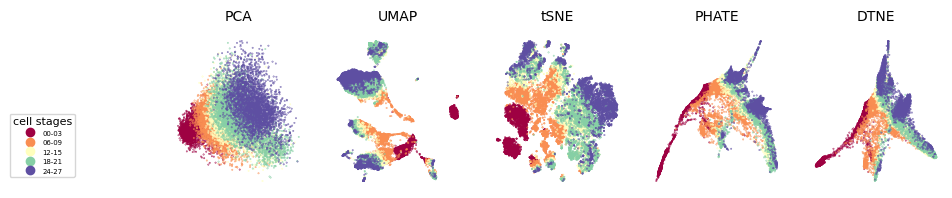

In [13]:
names = ['PCA','UMAP','tSNE','PHATE','DTNE']
name_Y = [Y_pca,Y_umap,Y_tsne,Y_phate,Y_dtne]
cmap = 'Spectral'
fig,axes = plt.subplots(ncols=6,figsize=(12, 2))
for i,ax in enumerate(axes):
    if i == 0:   
        ax0 = ax
        ax0.axis("off")
    else:
        ax.set_title(names[i-1],size=10,pad=10)
        if  i == 1:
            scatter = ax.scatter(x=name_Y[i-1]['0'], y=name_Y[i-1]['1'],c=cell_stage, s =0.1,cmap= cmap)
        else:
            scatter = ax.scatter(x=name_Y[i-1]['0'], y=name_Y[i-1]['1'],c=cell_stage, s =0.1,cmap= cmap)
            # sns.scatterplot(x=umap[:, 0], y=umap[:, 1], hue=time_list[i], ax=ax,s=80, palette=cmap, alpha=0.8)
            #
            # handles, labels = ax.get_legend_handles_labels()
        ax.axis("off")
        
handles, labels = scatter.legend_elements()
fig.legend(handles, list(sorted(set(sample_labels[1].values))), loc=3, ncol=1, bbox_to_anchor=(0.12, 0.15), frameon=True, title= "cell stages",fontsize = 5,title_fontsize=8)

In [14]:
def correlation_comparation(list_A,list_B):
    pearsonr_res = stats.pearsonr(list_A, list_B)
    spearmanr_res = stats.spearmanr(list_A, list_B) 
    tau, p_value = stats.kendalltau(list_A, list_B)
    return pearsonr_res.statistic,spearmanr_res.statistic,tau

In [15]:
dpt_corr = correlation_comparation(cell_stage,dpt_pseudotime)
dpt_corr

(0.5437583358015377, 0.8012915268464108, 0.6565459237242592)

In [16]:
palantir_corr = correlation_comparation(cell_stage,palantir_time)
palantir_corr

(0.6378096987122477, 0.685307833978522, 0.5498813169505284)

In [17]:
monocle_corr = correlation_comparation(cell_stage,monocle_time)
monocle_corr

(0.6651037161614497, 0.6818861315866227, 0.5414815453453206)

In [18]:
dtne_corr = correlation_comparation(cell_stage,dtne_time)
dtne_corr

(0.7313517525248038, 0.8381202091188548, 0.6949699628384354)

(0.0, 1.1)

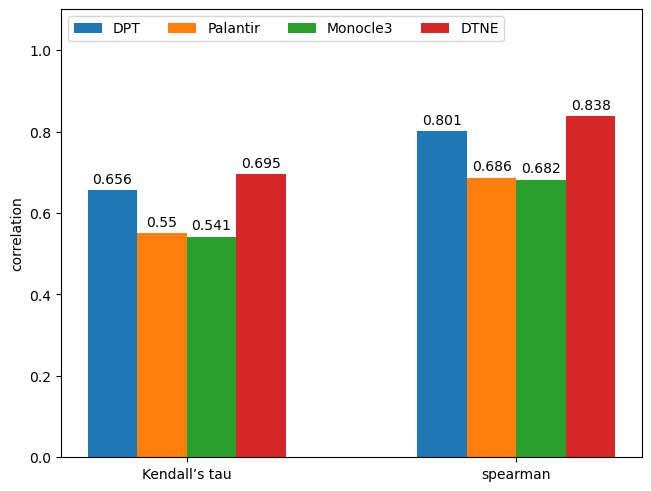

In [19]:
correlation = ['Kendall’s tau','spearman']
pseudotime_corr = {
    'DPT':(0.656, 0.801),
    'Palantir':(0.550, 0.686),
    'Monocle3':(0.541, 0.682),
    'DTNE':(0.695, 0.838)
    }

x = np.arange(len(correlation))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for name, corr in pseudotime_corr.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, corr, width, label=name)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Length (mm)')
# ax.set_title('Penguin attributes by species')
# ax.set_xticks(x + width, species)
# ax.legend(loc='upper left', ncols=3)
# ax.set_ylim(0, 250)
ax.set_ylabel('correlation')
ax.set_xticks(x + 1.5*width, correlation)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1.1)

Text(-0.9, 1.05, 'pseudotime')

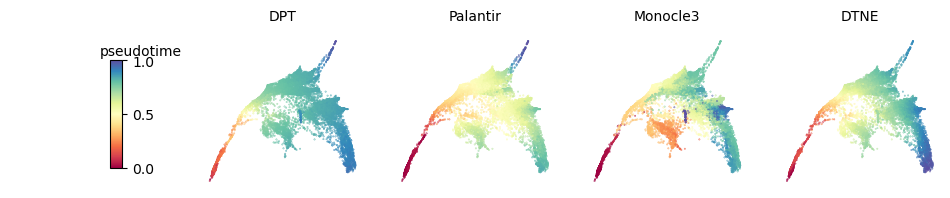

In [20]:
names = ['DPT','Palantir','Monocle3','DTNE']
time_list = [dpt_pseudotime,palantir_time,monocle_time,dtne_time]

cmap = 'Spectral'
fig,axes = plt.subplots(ncols=5,figsize=(12, 2))

for i,ax in enumerate(axes):
    if i == 0:
        ax0 = ax
    else:
        ax.set_title(names[i-1],size=10,pad=10)
        # sns.scatterplot(x=umap[:, 0], y=umap[:, 1], hue=time_list[i], ax=ax,s=80, palette=cmap, alpha=0.8)
        im = ax.scatter(x=Y_phate['0'], y=Y_phate['1'],c=time_list[i-1], s =0.1,cmap= cmap)
        ax.axis("off")
        # ax.legend().remove()


cax=fig.add_axes([ax0.get_position().x1-0.05, ax0.get_position().y0 +0.1, 0.01, ax0.get_position().height*0.7])
ax0.axis("off") 

cb = fig.colorbar(im,cax=cax, shrink=0.5,pad=0.3, location = 'right') # title= "pseudotimes", fontsize = 5,title_fontsize=15

ax = cb.ax
ax.text(-0.9,1.05,'pseudotime',rotation=0, )

In [21]:
def adjacency_dist_matrix(data,k_neighbors,root_indices):
    
    n_samples = data.shape[0]
    nbrs = neighbors.NearestNeighbors(n_neighbors=k_neighbors, metric='euclidean').fit(data)
    knn_dists, knn_indices = nbrs.kneighbors(data)
        
    indptr = range(0,(n_samples+1)*k_neighbors,k_neighbors)
    k_matrix = sparse.csr_matrix((knn_dists.flatten(),knn_indices.flatten(),indptr),shape=(n_samples,n_samples))
    adjacency_matrix = k_matrix.maximum(k_matrix.T) 
    
    geo_matrix = sparse.csgraph.dijkstra(csgraph=adjacency_matrix, directed=False, indices=root_indices, return_predecessors=False)
    
    return adjacency_matrix,geo_matrix 

In [22]:
adj,geo = adjacency_dist_matrix(EBT_counts.X,4,1257)

In [23]:
import matplotlib.gridspec as gridspec
geo = geo/max(geo)

Text(0.5, 0, 'DTNE')

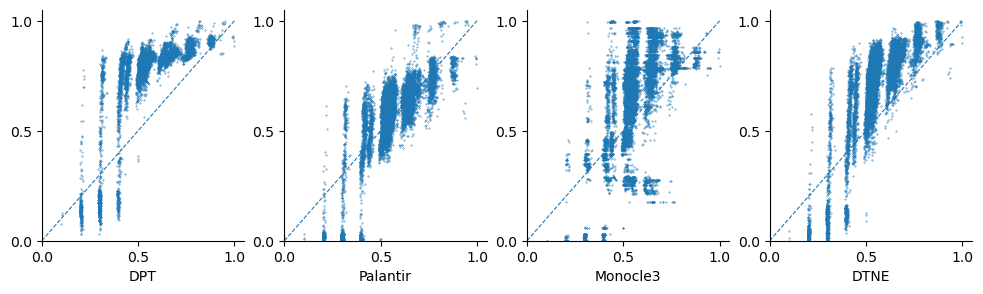

In [24]:
fig = plt.figure(figsize=(12, 3))

gs1 = gridspec.GridSpec(1, 4)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])
ax3 = fig.add_subplot(gs1[2])
ax4 = fig.add_subplot(gs1[3])

x = np.linspace(0, 1, 100)
y = x

for side in ['right','top']:
        ax1.spines[side].set_visible(False)    
ax1.plot(x, y,linestyle='--',c='tab:blue',lw=.8)
ax1.set_xlim(0, 1.05)
ax1.set_ylim(0, 1.05)
ax1.set_yticks([0,0.5,1])
ax1.scatter(geo,dpt_pseudotime,s=0.1)
ax1.set_xlabel('DPT')

for side in ['right','top']:
        ax2.spines[side].set_visible(False) 
ax2.plot(x, y,linestyle='--',c='tab:blue',lw=.8)
ax2.set_xlim(0, 1.05)
ax2.set_ylim(0, 1.05)
ax2.set_yticks([0,0.5,1])
ax2.scatter(geo,palantir_time,s=0.1)
ax2.set_xlabel('Palantir')

for side in ['right','top']:
        ax3.spines[side].set_visible(False) 
ax3.plot(x, y,linestyle='--',c='tab:blue',lw=.8)
ax3.set_xlim(0, 1.05)
ax3.set_ylim(0, 1.05)
ax3.set_yticks([0,0.5,1])
ax3.scatter(geo,monocle_time,s=0.1)
ax3.set_xlabel('Monocle3')

for side in ['right','top']:
        ax4.spines[side].set_visible(False) 
ax4.plot(x, y,linestyle='--',c='tab:blue',lw=.8)
ax4.set_xlim(0, 1.05)
ax4.set_ylim(0, 1.05)
ax4.set_yticks([0,0.5,1])
ax4.scatter(geo,dtne_time,s=0.1)
ax4.set_xlabel('DTNE')